## EDA on Final Dataset

In [58]:
#import requried libraries
import pandas as pd
pd.options.display.max_rows = 5
pd.options.display.max_columns=25

import numpy as np
import random as rand

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')

from pandas.api.types import CategoricalDtype


inputfile = 'CKME136X10_2018_Data_Cleaned_Transformed.csv'

In [59]:
# read data
df = pd.read_csv(inputfile, engine = 'python')

In [60]:
def typecast(df):
    df = df.astype('category')
    df['C_YEAR'] = df['C_YEAR'].astype(CategoricalDtype(ordered=True))
    df['C_MNTH'] = df['C_MNTH'].astype(CategoricalDtype(ordered=True))
    df['C_WDAY'] = df['C_WDAY'].astype(CategoricalDtype(ordered=True))
    df['C_HOUR'] = df['C_HOUR'].astype(CategoricalDtype(ordered=True))
    df['C_VEHS'] = df['C_VEHS'].astype('int')
    df['V_YEAR'] = df['V_YEAR'].astype(CategoricalDtype(ordered=True))
    df['P_PSN'] = df['P_PSN'].astype(CategoricalDtype(ordered=True))
    df['P_AGE'] = df['P_AGE'].astype('int')
    #df['P_ISEV'] = df['P_ISEV'].astype('int')
    return df

In [61]:
df = typecast(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336558 entries, 0 to 4336557
Data columns (total 19 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    int64
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_TYPE    category
V_YEAR    category
P_SEX     category
P_AGE     int64
P_PSN     category
P_SAFE    category
P_USER    category
P_ISEV    category
dtypes: category(17), int64(2)
memory usage: 136.5 MB


In [62]:
df_copy = df.copy()

In [63]:
df_fatal = df[df['P_ISEV'] == 3]
df_injury = df[df['P_ISEV'] == 2]
df_safe = df[df['P_ISEV'] == 1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3b42cc88>,
      dtype=object)

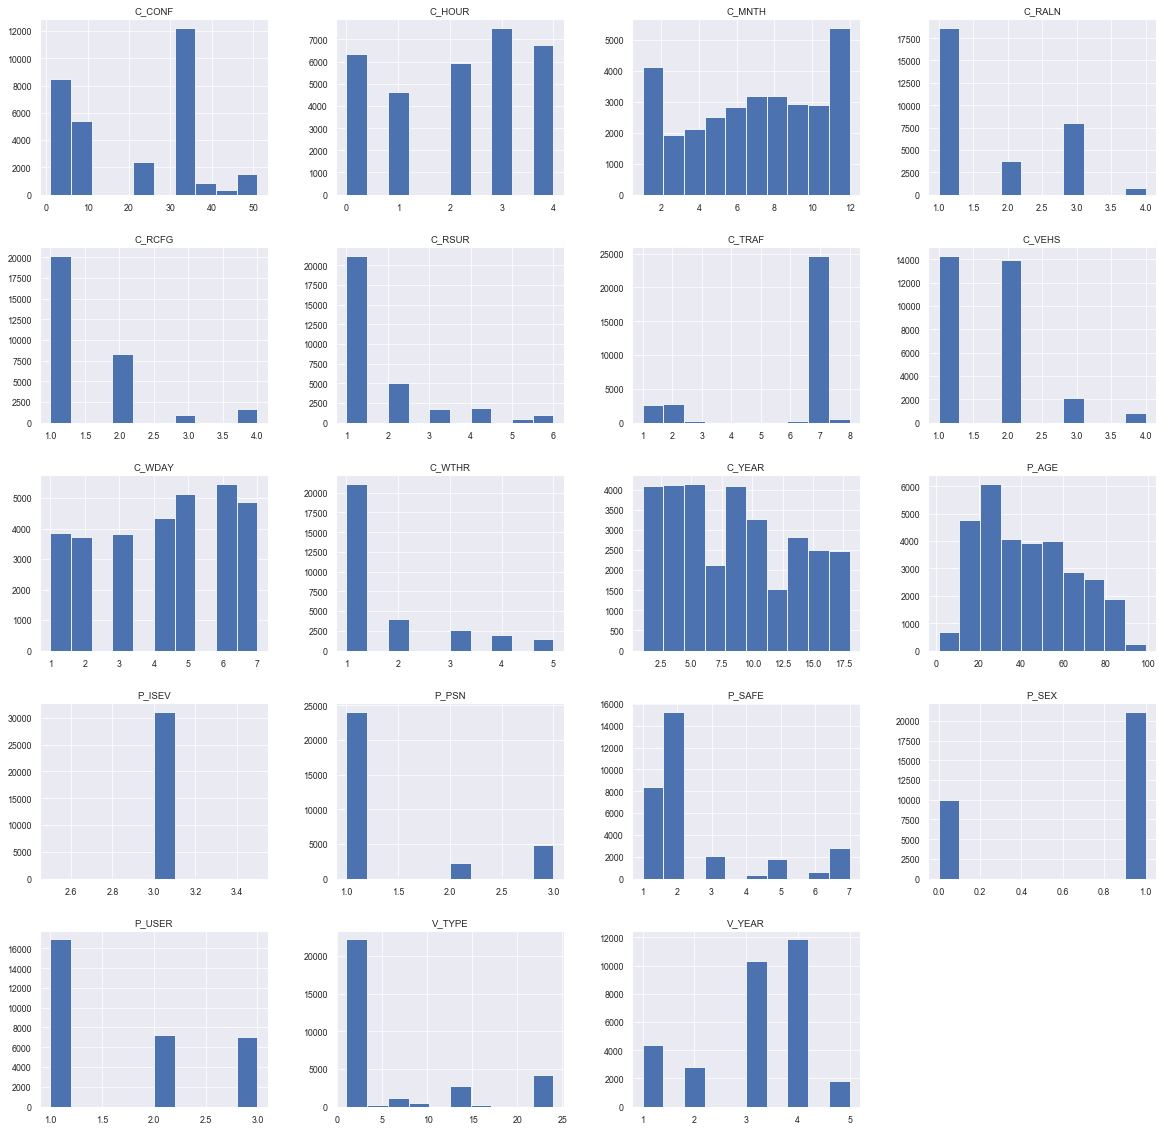

In [64]:
df_fatal.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27de6710>,
      dtype=object)

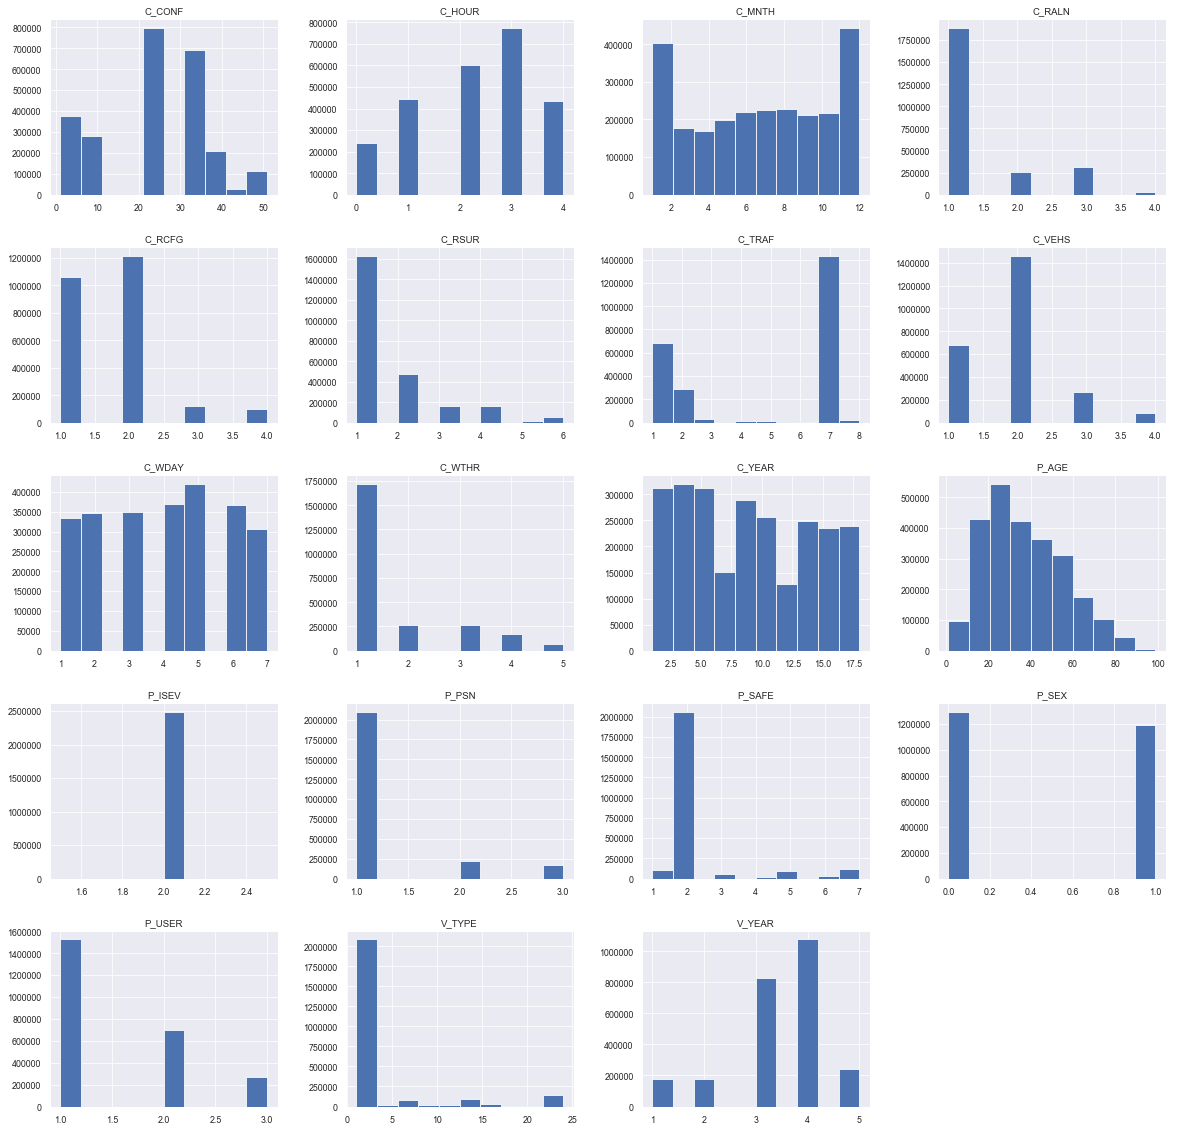

In [65]:
df_injury.astype('int').hist(figsize = [20, 20])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a278cd9e8>,
      dtype=object)

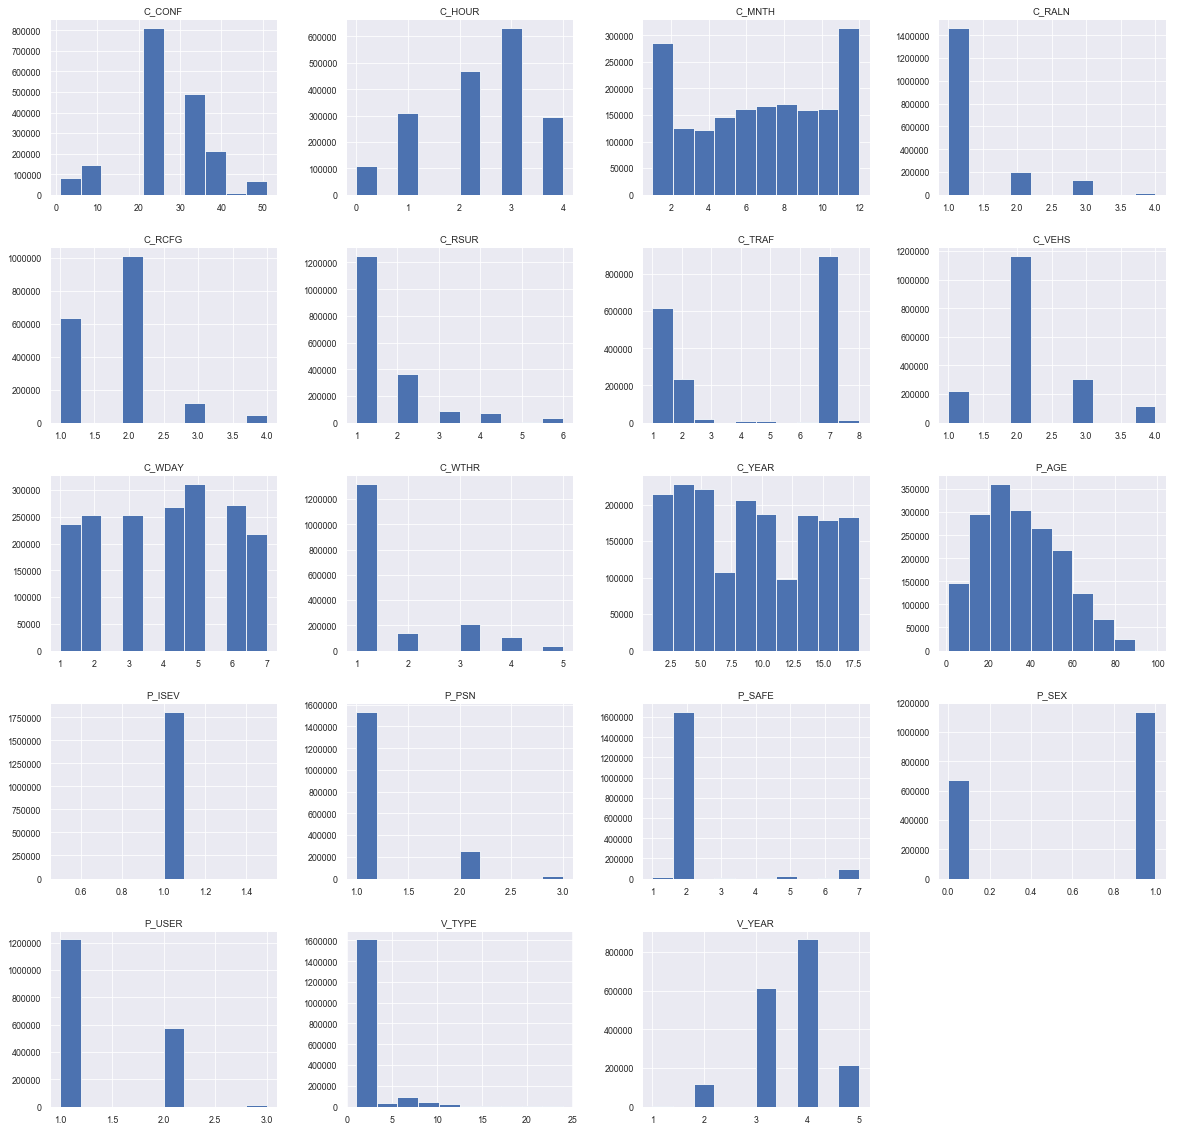

In [66]:
df_safe.astype('int').hist(figsize = [20, 20])

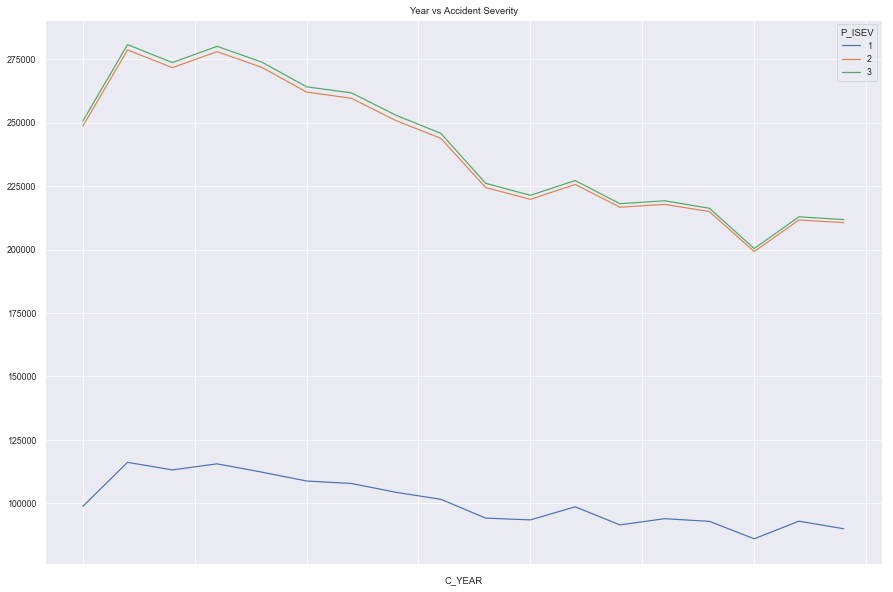

In [67]:

df.groupby(['C_YEAR', 'P_ISEV']).size().unstack().plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity', stacked = True)

In [68]:
def plot_year_vs_cat(data):
    df.groupby(['C_YEAR', 'P_ISEV']).size().unstack().plot(figsize=(15,10), kind='line', title = 'Year vs Accident Severity', stacked = True)

,C_YEAR,fatal,injury,no_injury
0,1,1998,149783,98799
1,2,2099,162473,116158
...,...,...,...,...
16,17,1263,118661,92971
17,18,1201,120605,89989


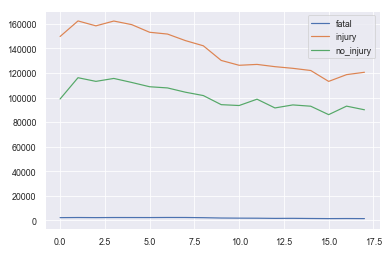

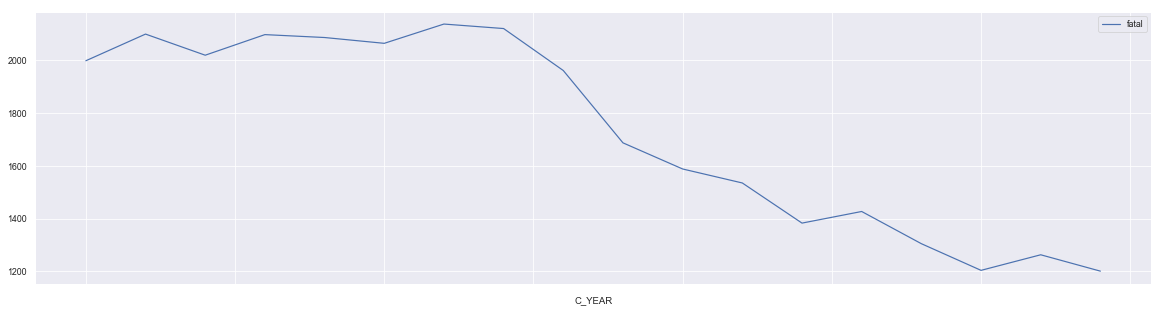

In [69]:
## Plot accident serverity by Year
df_tmp = df.copy()
df_tmp['fatal']=np.where(df_tmp['P_ISEV'] == 3,1,0)
df_tmp['injury']=np.where(df_tmp['P_ISEV'] == 2,1,0)
df_tmp['no_injury']=np.where(df_tmp['P_ISEV'] == 1,1,0)

df_plot = df_tmp.groupby('C_YEAR')['fatal','injury', 'no_injury'].sum()

tmp = df_plot.index
df_plot.reset_index(inplace=True)
df_plot['C_YEAR'] = tmp
display(df_plot)

df_plot.plot()
df_plot[['C_YEAR', 'fatal']].plot(x = 'C_YEAR', figsize = [20,5])